In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/content/StudentsPerformance.csv')
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
df['Marks'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

np.random.seed(42)
df['Attendance'] = np.random.randint(60, 101, size=len(df))

df['Logins'] = np.random.randint(5, 31, size=len(df))

df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average Score,Marks,Attendance,Logins
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,72.666667,98,19
1,female,group C,some college,standard,completed,69,90,88,82.333333,82.333333,88,30
2,female,group B,master's degree,standard,none,90,95,93,92.666667,92.666667,74,18
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,49.333333,67,15
4,male,group C,some college,standard,none,76,78,75,76.333333,76.333333,80,16


In [14]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   Average Score                1000 non-null   float64
 9   Marks                        1000 non-null   float64
 10  Attendance                   1000 non-null   int64  
 11  Logins                       1000 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0
Average Score,0
Marks,0


In [15]:
df.dropna(inplace=True)


In [16]:
print("Average Math Score:", df['math score'].mean())
print("Average Reading Score:", df['reading score'].mean())
print("Average Writing Score:", df['writing score'].mean())

Average Math Score: 66.089
Average Reading Score: 69.169
Average Writing Score: 68.054


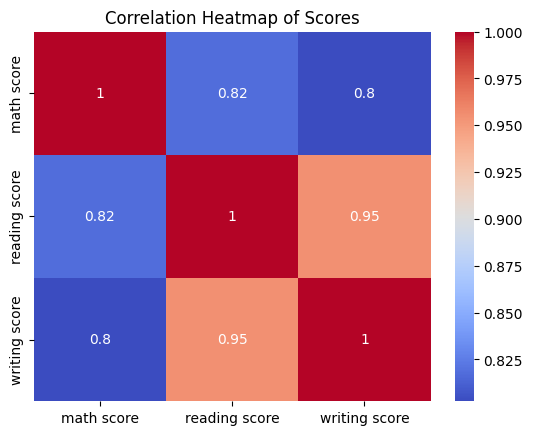

In [17]:
sns.heatmap(df[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Scores")
plt.show()

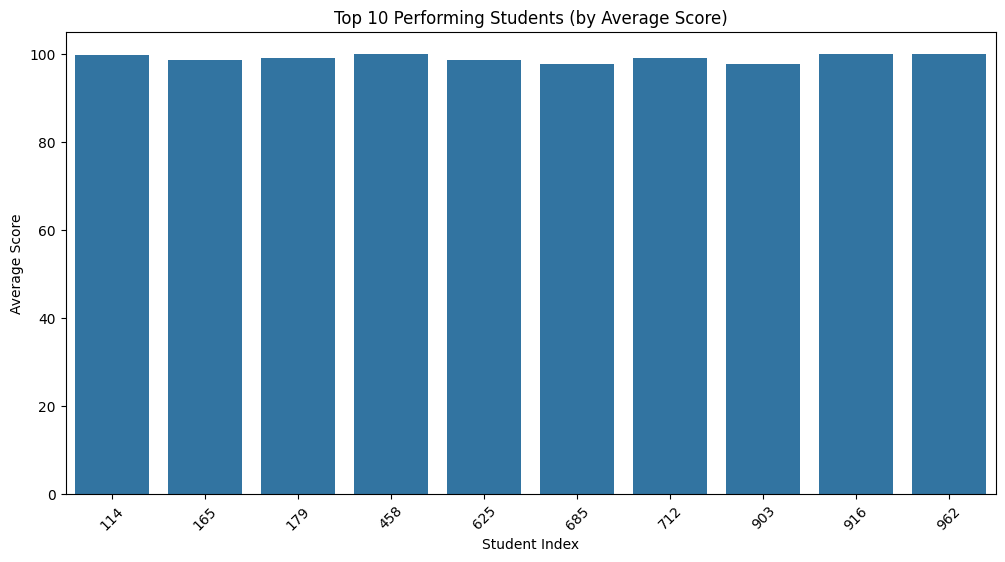

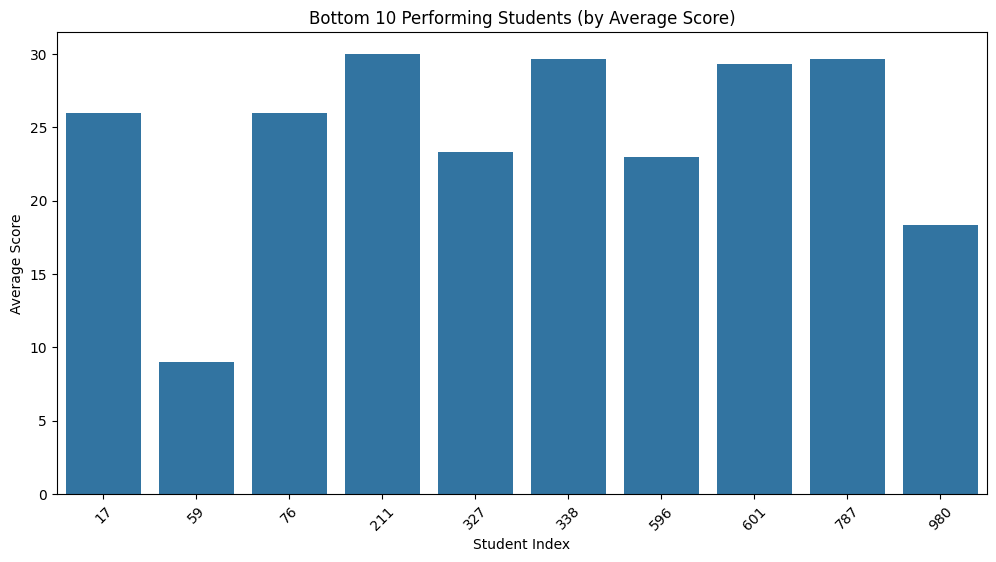

In [18]:
df['Average Score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

top_students = df.sort_values(by='Average Score', ascending=False).head(10)
struggling_students = df.sort_values(by='Average Score').head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_students.index, y='Average Score', data=top_students)
plt.title('Top 10 Performing Students (by Average Score)')
plt.xlabel('Student Index')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=struggling_students.index, y='Average Score', data=struggling_students)
plt.title('Bottom 10 Performing Students (by Average Score)')
plt.xlabel('Student Index')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()

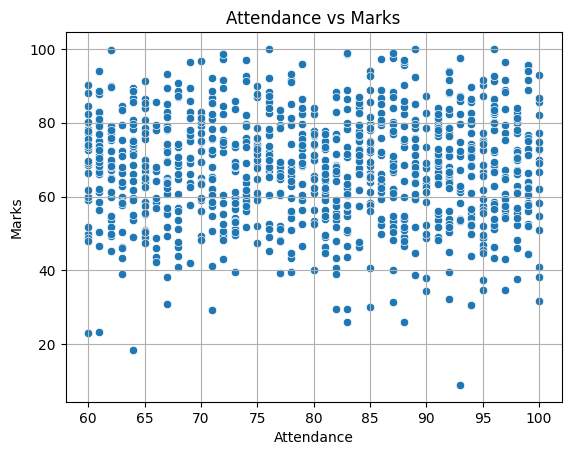

In [20]:
sns.scatterplot(x='Attendance', y='Marks', data=df)
plt.title('Attendance vs Marks')
plt.grid(True)
plt.show()


In [24]:

correlation_matrix = df[['Marks', 'Attendance', 'Logins']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

avg_corr = correlation_matrix.where(~np.eye(correlation_matrix.shape[0],dtype=bool)).mean().mean()
print("\nAverage Correlation (excluding diagonals):", round(avg_corr, 3))


Correlation Matrix:
               Marks  Attendance    Logins
Marks       1.000000   -0.011772 -0.040762
Attendance -0.011772    1.000000  0.053746
Logins     -0.040762    0.053746  1.000000

Average Correlation (excluding diagonals): 0.0


In [26]:

df['Attendance_Group'] = pd.cut(df['Attendance'], bins=[59, 70, 80, 90, 100], labels=['<70%', '70–80%', '80–90%', '90–100%'])

attendance_impact = df.groupby('Attendance_Group')['Marks'].mean().reset_index().sort_values(by='Attendance_Group')
print(attendance_impact)


  Attendance_Group      Marks
0             <70%  67.946317
1           70–80%  68.420970
2           80–90%  67.161458
3          90–100%  67.659091


<ipython-input-26-1117226132>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attendance_impact = df.groupby('Attendance_Group')['Marks'].mean().reset_index().sort_values(by='Attendance_Group')


In [28]:
!pip install plotly
import plotly.express as px
fig = px.scatter(df, x="Attendance", y="Marks", color="Logins", title="Student Performance Interactive")
fig.show()